In [18]:
from tensorflow import keras

IMPORTING ALL REQUIRED KERAS LAYERS

In [17]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, \
     Concatenate, AvgPool2D, Dropout, Flatten, Dense


**GOOGLE NET IMPLEMENTATION **

In GoogleNet starts with two Conv-MaxPool blocks and then continues with a series of Inception blocks separated by Max Pool layers before the fineal Fully Connected layer.

In [3]:
# implementing inception block

In [5]:

# filters a list of no of filters respectively in the inception block

def inception_block(x,filters):
    t1 = Conv2D(filters=filters[0], kernel_size=1, activation='relu')(x)

    t2 = Conv2D(filters=filters[1], kernel_size=1, activation='relu')(x)
    t2 = Conv2D(filters=filters[2], kernel_size=3, padding='same', activation='relu')(t2)

    t3 = Conv2D(filters=filters[3], kernel_size=1, activation='relu')(x)
    t3 = Conv2D(filters=filters[4], kernel_size=5, padding='same', activation='relu')(t3)

    t4 = MaxPool2D(pool_size=3, strides=1, padding='same')(x)
    t4 = Conv2D(filters=filters[5], kernel_size=1, activation='relu')(t4)
    # concatenating
    output = Concatenate()([t1, t2, t3, t4])
    return output






  
  

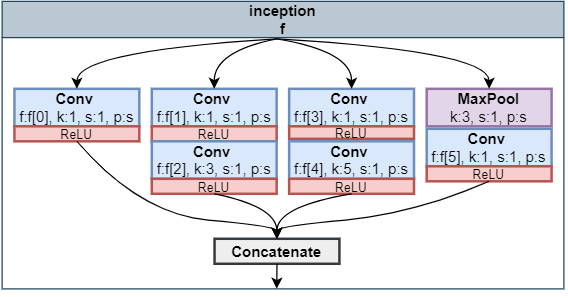

In [12]:
from IPython.display import Image
Image('Capture.PNG')

TESTING THE INCEPTION BLOCK

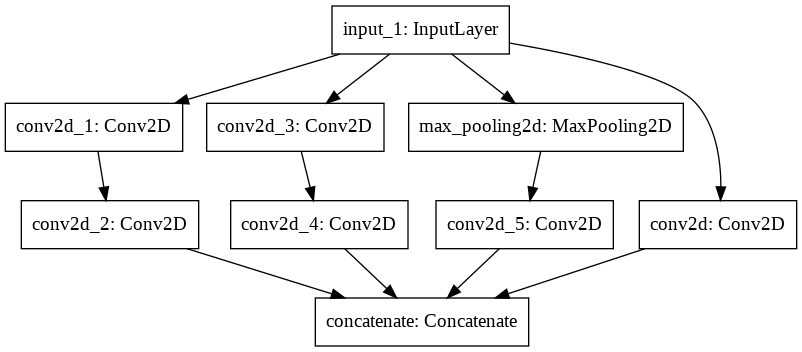

In [13]:

input = Input([224, 224, 3])
output = inception_block(input, filters=[1, 1, 1, 1, 1, 1])

from tensorflow.keras import Model
model = Model(input, output)

from tensorflow.keras.utils import plot_model
plot_model(model)

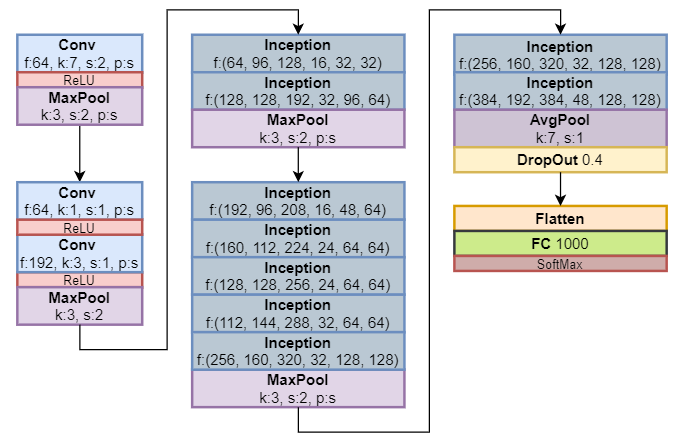

In [14]:
Image('c.PNG')

In [20]:
# implementing the model


In [21]:
input = Input(shape=(224,224,3))

In [22]:
x= Conv2D(filters=64,kernel_size=7,strides=2,padding='same',activation='relu')(input)

In [23]:
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

In [24]:
x = Conv2D(filters=64, kernel_size=1, activation='relu')(x)
x = Conv2D(filters=192, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=3, strides=2)(x)

In [25]:
x = inception_block(x, filters=[64, 96, 128, 16, 32, 32])
x = inception_block(x, filters=[128, 128, 192, 32, 96, 64])
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

In [26]:
x = inception_block(x, filters=[192, 96, 208, 16, 48, 64])
x = inception_block(x, filters=[160, 112, 224, 24, 64, 64])
x = inception_block(x, filters=[128, 128, 256, 24, 64, 64])
x = inception_block(x, filters=[112, 144, 288, 32, 64, 64])
x = inception_block(x, filters=[256, 160, 320, 32, 128, 128])
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

In [27]:
# last block
x = inception_block(x, filters=[256, 160, 320, 32, 128, 128])
x = inception_block(x, filters=[384, 192, 384, 48, 128, 128])

In [28]:
x = AvgPool2D(pool_size=7, strides=1)(x)
x = Dropout(rate=0.4)(x)

x = Flatten()(x)

In [29]:
# output layer
output = Dense(units=1000, activation='softmax')(x)

In [30]:
model = Model(inputs=input, outputs=output)

In [31]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 56, 56, 64)   0           conv2d_6[0][0]                   
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 56, 56, 64)   4160        max_pooling2d_1[0][0]            
____________________________________________________________________________________________